Locally Interpretable Model Agnostic Explanations (LIME) is a local linear approximation of the complex non-linear model's behaviour. While the model may be very complex globally, it is easier to approximate it around the vicinity of a particular instance. While treating the model as a black box, the instance are perturbed and a sparse linear model is learned around it as an explanation.

In [2]:
from __future__ import print_function

from lime import lime_image
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from skimage.segmentation import mark_boundaries
from keras.models import load_model
%matplotlib inline

Lets load the model trained on the Pneumonia dataset and display its summary

In [3]:
from keras.models import load_model

model = load_model('weights/weights-improvement-39-0.9615.hdf5') #path to your model
print("Loaded model from disk")

#display model summary
model.summary()

#fix optimizer
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True) 
model.compile(optimizer=sgd,
      loss='categorical_crossentropy',
      metrics=['accuracy'])

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)   

Lets load a sample chest radiograph and predict on it using the trained model

[0.00442924 0.99557084]


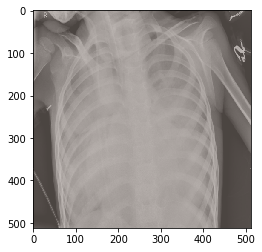

In [7]:
img_path = 'person998_bacteria_2927.jpg'
img = image.load_img(img_path)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x /= 255 
preds = model.predict(x)[0]
print(preds)

#display the image
plt.imshow(x[0] / 2 + 0.5) #this increases the brightness of the image

Now lets get an explanation

In [8]:
explainer = lime_image.LimeImageExplainer()

hide_color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels. Here, we set it to 0, means gray)

In [9]:
explanation = explainer.explain_instance(x[0], model.predict, 
                                         top_labels=2, hide_color=0, num_samples=1000)

Now let's see the explanation for the top class (pneumonia). We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden. 

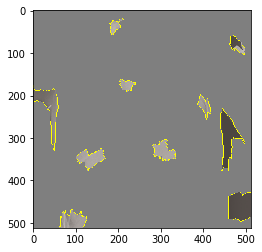

In [11]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, 
                                            num_features=30, hide_rest=True) #modify class indices for visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or with the rest of the image present

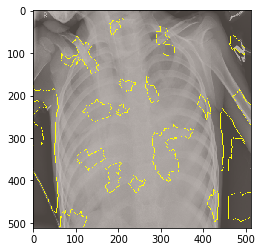

In [14]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, 
                                            num_features=30, hide_rest=False)#modify class indices for visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

We can also see the 'pros and cons' (pros in green, cons in red)

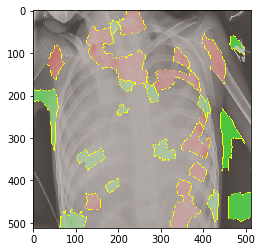

In [15]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, 
                                            num_features=30, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))